## Part 4 - Data Prep and Feature Selection

In [1]:
# Libraries
import pandas as pd

#### Connect to database

In [2]:
# save remaining data to PostgreSQL databse
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
#connect database
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'11207471' # this is the password established during installation
port = r'5432' # default port estabalished during install
schema = r'raw' # schema we just created

In [3]:
db_conn = create_engine(f"postgresql://{user}:{pw}@{host}:{port}/{db}")

In [4]:
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb
1,chicago_data_cleaning_preprocess
2,global_warming


In [5]:
table_name = r'chicago_airbnb'

In [6]:
sql=r'SELECT * FROM ' + schema + '.' + table_name
df = pd.read_sql(sql, db_conn, index_col=None)

In [7]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,None,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,None,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,None,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,None,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,None,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


#### Feature Selection

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6297
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1113
reviews_per_month                 1113
calculated_host_listings_count       0
availability_365                     0
dtype: int64

* Since our analytical question focuses on the type of dwelling, we will remove unnecessary columns for the following reasons:

  - **`id`** → Not relevant to pricing analysis.  
  - **`name`** → The listing name is just a label/address, which isn’t a categorical value and doesn’t influence price.  
  - **`host_id`** → Unique to each host and not useful for factors influencing rental price.  
  - **`host_name`** → Just a name and doesn’t impact pricing.  
  - **`last_review`** → A date alone might not influence price.  
  - **`neighbourhood_group`** → Has a lot of missing values.  


In [10]:
new_df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood_group'], axis=1)
new_df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2.56,1,353
1,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2.81,1,155
2,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2.81,1,321
3,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,0.63,9,300
4,Hyde Park,41.79612,-87.59261,Private room,21,1,44,0.61,5,168
...,...,...,...,...,...,...,...,...,...,...
6292,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,NaN,4,180
6293,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,NaN,4,180
6294,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,NaN,4,177
6295,West Town,41.89005,-87.66668,Private room,53,32,0,NaN,1,83


#### Clean dataset

- To prep our dataset for machine learning, we will first look for **missing values** and drop rows with missing values

In [11]:
new_df.isna().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1113
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- we can see above the only row with missing values is `reviews_per_month`. Since less than 30% of the data is missing we will drop all the rows with the missing value

In [12]:
new_df.dropna(inplace=True)

In [13]:
new_df.isna().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- For our next step of data cleaning we will look for any **duplicates** in our dataset other than drop

In [14]:
new_df.duplicated().sum()

np.int64(0)

- no duplicate values in our dataset

- below we look at identifying **outliers**

In [15]:
new_df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2.56,1,353
1,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2.81,1,155
2,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2.81,1,321
3,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,0.63,9,300
4,Hyde Park,41.79612,-87.59261,Private room,21,1,44,0.61,5,168


In [16]:
new_df.describe()[['price']]

,price
count,5184.000000
mean,145.236111
std,369.526406
min,10.000000
25%,61.000000
50%,95.000000
75%,150.000000
max,10000.000000


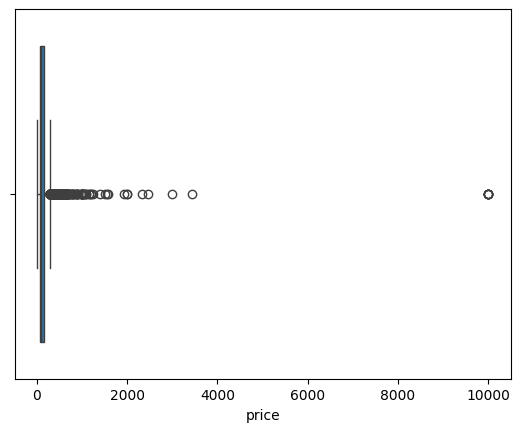

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=new_df['price'])
plt.show()

- We can see above that with our describe function, we have a max price of 10,000 and a mean of 145. Seeing how low the mean is compared to the max value shows that the max value is an outlier. After visualizing the price column of our dataset, we find that we have more than one price outlier in our dataset.
- To get rid of our outliers, we will drop them using the IQR method as seen below.

In [18]:
import numpy as np
import numpy as np

# IQR method to detect outliers
Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify outliers (rows where price is outside the boundaries)
# Remove only high outliers (since negative price doesn't make sense)
outliers = new_df[new_df['price'] > upper].index

# Remove outliers in a single step
new_df.drop(index=outliers, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", new_df.shape)


New Shape:  (4758, 10)


In [19]:
print("lower", lower)
print("upper", upper)

lower -72.5
upper 283.5


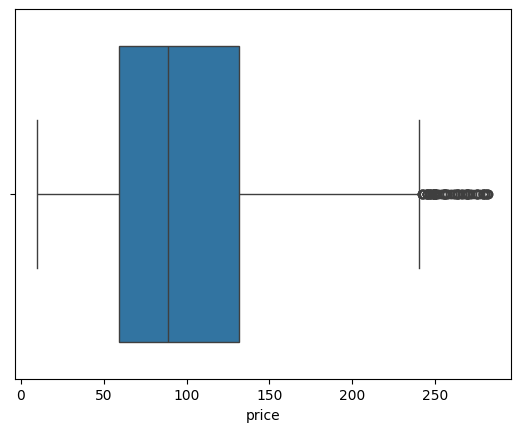

In [20]:
sns.boxplot(x=new_df['price'])
plt.show()

- Above, we removed outliers using the IQR method. However, our boxplot still shows some values that appear to be outliers. We will keep these values since our outlier threshold was set at a price of 283.5.

- Additionally, we did not remove outliers below the lower IQR bound because it is not possible to have a negative price.

**encoding columns**<br>
For our machine learning algorithm to identify patterns, it's important to encode categorical values. We choose one-hot encoding over label encoding because label encoding is more suitable for ordinal features in a dataset.
The features `room_type` and `neighborhood` are nominal variables, making one-hot encoding the better choice.


In [21]:
new_df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2.56,1,353
1,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2.81,1,155
2,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2.81,1,321
3,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,0.63,9,300
4,Hyde Park,41.79612,-87.59261,Private room,21,1,44,0.61,5,168


In [22]:
new_df['neighbourhood'].value_counts()

neighbourhood
West Town          576
Lake View          404
Near North Side    362
Logan Square       335
Lincoln Park       234
                  ... 
South Deering        2
West Pullman         1
West Englewood       1
Burnside             1
East Side            1
Name: count, Length: 76, dtype: int64

In [23]:
new_df['room_type'].value_counts()

room_type
Entire home/apt    3117
Private room       1512
Shared room          71
Hotel room           58
Name: count, dtype: int64

In [24]:
df_cleaned = pd.get_dummies(new_df, columns=['room_type', 'neighbourhood'])
df_cleaned

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,...,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_West Elsdon,neighbourhood_West Englewood,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn
0,41.78790,-87.58780,60,2,178,2.56,1,353,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41.85495,-87.69696,105,2,395,2.81,1,155,True,False,...,False,False,False,False,False,False,False,False,False,False
2,41.90289,-87.68182,60,2,384,2.81,1,321,True,False,...,False,False,False,False,False,False,False,False,True,False
3,41.91769,-87.63788,65,4,49,0.63,9,300,True,False,...,False,False,False,False,False,False,False,False,False,False
4,41.79612,-87.59261,21,1,44,0.61,5,168,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,41.94060,-87.72281,67,1,2,2.00,1,307,True,False,...,False,False,False,False,False,False,False,False,False,False
6226,41.99222,-87.71659,24,1,2,2.00,4,14,False,False,...,False,False,False,False,False,False,False,False,False,False
6230,41.95513,-87.65095,97,1,2,2.00,4,81,True,False,...,False,False,False,False,False,False,False,False,False,False
6249,41.87195,-87.66456,54,1,1,1.00,4,359,False,False,...,False,False,False,False,False,False,False,False,False,False


# part 4 - cont.

Below you will find the code for the table that demonstrates the steps to take when working with a live dataset.

In [25]:
data_cleaning = {
    'field_name': ['id', 'name', 'host_id', 
                   'host_name', 'last_review', 
                   'neighbourhood_group', 
                   'reviews_per_month', 'price', 
                   'room_type', 'neighbourhood'],
    'action': ['drop', 'drop', 'drop', 'drop', 'drop', 'drop', 
               'remove_missing', 
               'remove_outliers', 
               'one_hot_encode', 
               'one_hot_encode'],
    'values': [None, None, None, None, None, None, 
               None, 
               'lower_threshold: -72.5, upper_threshold: 283.5',
               'Entire home/apt, Hotel room, Private room, Shared room',
               'Albany Park, Archer Heights, Armour Square, Ashburn, Auburn Gresham, Austin, Avalon Park, Avondale, Belmont Cragin, Beverly, Bridgeport, Brighton Park, Burnside, Calumet Heights, Chatham, Chicago Lawn, Clearing, Douglas, Dunning, East Garfield Park, East Side, Edgewater, Edison Park, Englewood, Forest Glen, Fuller Park, Gage Park, Garfield Ridge, Grand Boulevard, Greater Grand Crossing, Hegewisch, Hermosa, Humboldt Park, Hyde Park, Irving Park, Jefferson Park, Kenwood, Lake View, Lincoln Park, Lincoln Square, Logan Square, Loop, Lower West Side, Mckinley Park, Montclare, Morgan Park, Mount Greenwood, Near North Side, Near South Side, Near West Side, New City, North Center, North Lawndale, North Park, Norwood Park, Oakland, Ohare, Portage Park, Pullman, Rogers Park, Roseland, South Chicago, South Deering, South Lawndale, South Shore, Uptown, Washington Heights, Washington Park, West Elsdon, West Englewood, West Garfield Park, West Lawn, West Pullman, West Ridge, West Town, Woodlawn']
}

In [26]:
cleansing_actions_df = pd.DataFrame(data_cleaning)

In [27]:
cleansing_actions_df

,field_name,action,values
0,id,drop,None
1,name,drop,None
2,host_id,drop,None
3,host_name,drop,None
4,last_review,drop,None
5,neighbourhood_group,drop,None
6,reviews_per_month,remove_missing,None
7,price,remove_outliers,"lower_threshold: -72.5, upper_threshold: 283.5"
8,room_type,one_hot_encode,"Entire home/apt, Hotel room, Private room, Sha..."
9,neighbourhood,one_hot_encode,"Albany Park, Archer Heights, Armour Square, As..."


In [28]:
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb
1,chicago_data_cleaning_preprocess
2,global_warming


In [29]:
table_name = r'chicago_data_cleaning_preprocess'
cleansing_actions_df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

10

In [30]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb
1,chicago_data_cleaning_preprocess
2,global_warming


In [31]:
schema = r'cleaned'
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb_cleaned
1,global_warming2
2,global_warming_Wth_Risk_Level
3,global_warming_cleaned


In [32]:
schema = r'cleaned'
table_name = r'chicago_airbnb_cleaned'
df_cleaned.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

4758

In [33]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb_cleaned
1,global_warming2
2,global_warming_Wth_Risk_Level
3,global_warming_cleaned


# screenshot of PgAdmin showing newly created table (data cleaing process)
![pgAdmin image](preprocess.png)

# screenshot of PgAdmin showing newly created table (cleaned dataset)
![pgAdmin image](cleaned_data.png)

# Part 5 - Feature Engineering and Final Prep 

### Analytical Question
   - What factors influence the nightly rental price of an Airbnb in Chicago, and how can these factors be used to estimate a competitive price for a given property type?

### New features
- price_per_room --> Calculates the average price per room per night.
- booking_frequency --> Reflects the frequency or demand of a property being booked.

In [36]:
df_cleaned.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,...,neighbourhood_Washington Heights,neighbourhood_Washington Park,neighbourhood_West Elsdon,neighbourhood_West Englewood,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn
0,41.78790,-87.58780,60,2,178,2.56,1,353,False,False,...,False,False,False,False,False,False,False,False,False,False
1,41.85495,-87.69696,105,2,395,2.81,1,155,True,False,...,False,False,False,False,False,False,False,False,False,False
2,41.90289,-87.68182,60,2,384,2.81,1,321,True,False,...,False,False,False,False,False,False,False,False,True,False
3,41.91769,-87.63788,65,4,49,0.63,9,300,True,False,...,False,False,False,False,False,False,False,False,False,False
4,41.79612,-87.59261,21,1,44,0.61,5,168,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_cleaned['booking_frequency'] = df_cleaned['number_of_reviews'] / df_cleaned['availability_365']
df_cleaned['price_per_room'] = df_cleaned['price'] / df_cleaned['minimum_nights']
df_cleaned.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,...,neighbourhood_West Elsdon,neighbourhood_West Englewood,neighbourhood_West Garfield Park,neighbourhood_West Lawn,neighbourhood_West Pullman,neighbourhood_West Ridge,neighbourhood_West Town,neighbourhood_Woodlawn,booking_frequency,price_per_room
0,41.78790,-87.58780,60,2,178,2.56,1,353,False,False,...,False,False,False,False,False,False,False,False,0.504249,30.00
1,41.85495,-87.69696,105,2,395,2.81,1,155,True,False,...,False,False,False,False,False,False,False,False,2.548387,52.50
2,41.90289,-87.68182,60,2,384,2.81,1,321,True,False,...,False,False,False,False,False,False,True,False,1.196262,30.00
3,41.91769,-87.63788,65,4,49,0.63,9,300,True,False,...,False,False,False,False,False,False,False,False,0.163333,16.25
4,41.79612,-87.59261,21,1,44,0.61,5,168,False,False,...,False,False,False,False,False,False,False,False,0.261905,21.00


##### update/create chicago_data_cleaning_preprocess_2 database table

In [39]:
data_cleaning_2 = {
    'field_name': ['id', 'name', 'host_id', 
                   'host_name', 'last_review', 
                   'neighbourhood_group', 
                   'reviews_per_month', 'price', 
                   'room_type', 'neighbourhood','booking_frequency','price_per_room'],
    'action': ['drop', 'drop', 'drop', 'drop', 'drop', 'drop', 
               'remove_missing', 
               'remove_outliers', 
               'one_hot_encode', 
               'one_hot_encode', 'add','add'],
    'values': [None, None, None, None, None, None, 
               None, 
               'lower_threshold: -72.5, upper_threshold: 283.5',
               'Entire home/apt, Hotel room, Private room, Shared room',
               'Albany Park, Archer Heights, Armour Square, Ashburn, Auburn Gresham, Austin, Avalon Park, Avondale, Belmont Cragin, Beverly, Bridgeport, Brighton Park, Burnside, Calumet Heights, Chatham, Chicago Lawn, Clearing, Douglas, Dunning, East Garfield Park, East Side, Edgewater, Edison Park, Englewood, Forest Glen, Fuller Park, Gage Park, Garfield Ridge, Grand Boulevard, Greater Grand Crossing, Hegewisch, Hermosa, Humboldt Park, Hyde Park, Irving Park, Jefferson Park, Kenwood, Lake View, Lincoln Park, Lincoln Square, Logan Square, Loop, Lower West Side, Mckinley Park, Montclare, Morgan Park, Mount Greenwood, Near North Side, Near South Side, Near West Side, New City, North Center, North Lawndale, North Park, Norwood Park, Oakland, Ohare, Portage Park, Pullman, Rogers Park, Roseland, South Chicago, South Deering, South Lawndale, South Shore, Uptown, Washington Heights, Washington Park, West Elsdon, West Englewood, West Garfield Park, West Lawn, West Pullman, West Ridge, West Town, Woodlawn',
              'number_of_reviews / availability_365',
              'price / minimum_nights']
}

In [40]:
cleansing_actions_df_2 = pd.DataFrame(data_cleaning_2)

In [41]:
cleansing_actions_df_2

,field_name,action,values
0,id,drop,None
1,name,drop,None
2,host_id,drop,None
3,host_name,drop,None
4,last_review,drop,None
5,neighbourhood_group,drop,None
6,reviews_per_month,remove_missing,None
7,price,remove_outliers,"lower_threshold: -72.5, upper_threshold: 283.5"
8,room_type,one_hot_encode,"Entire home/apt, Hotel room, Private room, Sha..."
9,neighbourhood,one_hot_encode,"Albany Park, Archer Heights, Armour Square, As..."


In [43]:
schema = r'raw'
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb
1,chicago_data_cleaning_preprocess
2,global_warming


In [44]:

table_name = r'chicago_data_cleaning_preprocess_2'
cleansing_actions_df_2.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

12

In [45]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb
1,chicago_data_cleaning_preprocess
2,chicago_data_cleaning_preprocess_2
3,global_warming


# screenshot of PgAdmin showing newly created table (cleaning_process)
![pgAdmin image](screenshot_3.png)

##### Save new dataset

In [49]:
schema = r'cleaned'
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb_cleaned
1,global_warming2
2,global_warming_Wth_Risk_Level
3,global_warming_cleaned


In [51]:
table_name = r'chicago_airbnb_cleaned_2'
df_cleaned.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')


4758

In [52]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,chicago_airbnb_cleaned
1,chicago_airbnb_cleaned_2
2,global_warming2
3,global_warming_Wth_Risk_Level
4,global_warming_cleaned


# screenshot of PgAdmin showing dataset with new features
![pgAdmin image](screenshot_4.png)